In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


## Default Model

In [3]:
def plot_default(spe1,
                 spe2,
                 d=4,
                 ax=None,
                 color=None,
                 label1=None,
                 label2=None,
                 tmin=1e0):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label1 == None:
        label1 = r'${}$'.format(latex_name(spe1))
    if label2 == None:
        label2 = r'${}$'.format(latex_name(spe2))

    j = str(d)
    Abu1 = Abu(j)
    t = Abu1.t
    arg = np.argwhere(t >= tmin)
    diag1 = Abu1.abu[arg, eval('krome_idx_' + spe1)]
    diag2 = Abu1.abu[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag1, diag2, color=color, linewidth=3, label='X-ray')

    Abu2 = Abu('0' + str(d))
    diag_stop1 = Abu2.abu[arg, eval('krome_idx_' + spe1)]
    diag_stop2 = Abu2.abu[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag_stop1,
              diag_stop2,
              color=color,
              linewidth=3,
              linestyle='--',
              label='X-ray removed')

    raw = np.loadtxt('./data/2dis_inf')

    d = r'$n_{\mathrm{H}}$'
    diag_default1 = raw[arg, eval('krome_idx_' + spe1)]
    diag_default2 = raw[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag_default1,
              diag_default2,
              color='black',
              linewidth=3,
              linestyle='-.',
              label='No X-ray')

    ax.set_xlabel(r'$n(${}$)$'.format(label1) + '/' + Abu1.name_div,
                  fontsize=25)
    ax.set_ylabel(r'$n(${}$)$'.format(label2) + '/' + Abu2.name_div,
                  fontsize=25)

    lower1 = np.array([diag1.min(),
                       diag_stop1.min(),
                       diag_default1.min()]).min() * 0.5
    upper1 = np.array([diag1.max(),
                       diag_stop1.max(),
                       diag_default1.max()]).max() * 2
    ax.set_xlim(lower1, upper1)
    lower2 = np.array([diag2.min(),
                       diag_stop2.min(),
                       diag_default2.min()]).min() * 0.5
    upper2 = np.array([diag2.max(),
                       diag_stop2.max(),
                       diag_default2.max()]).max() * 2
    ax.set_ylim(lower2, upper2)

    #ax.legend(loc=0, prop={'size': 20})
    #ax.set_xlim(Range)

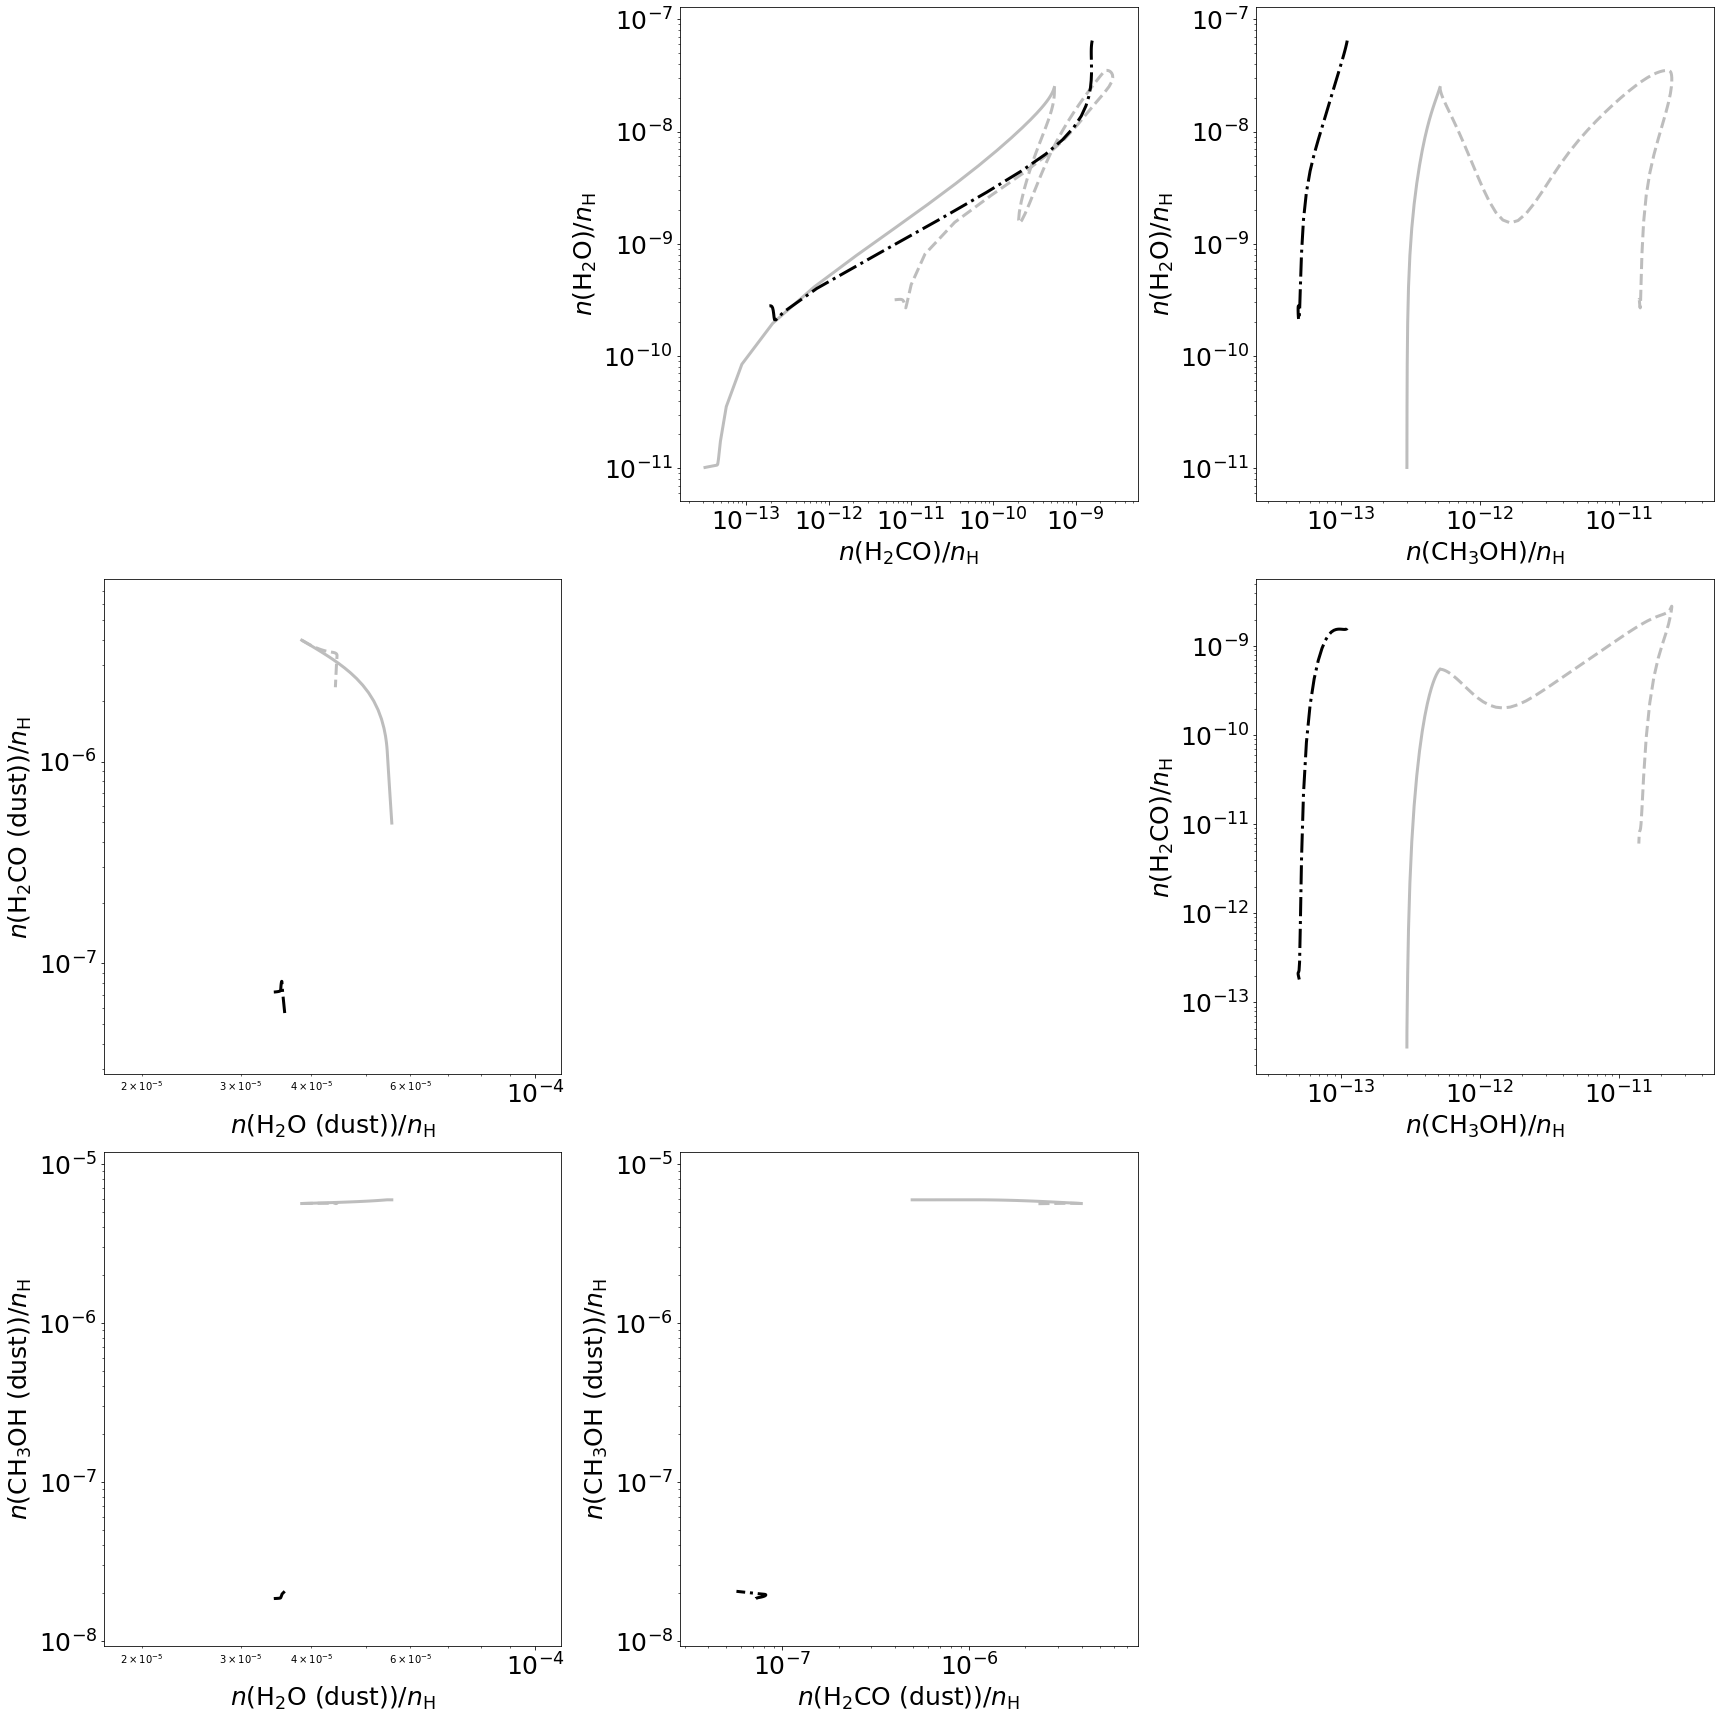

In [70]:
species = ['H2O', 'H2CO', 'CH3OH']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'H_DUSTH_DUSTC_DUSTO_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST'
]
l = len(species)
f, ax = plt.subplots(l,
                     l,
                     figsize=(8 * l, 8 * l))
for i in range(l):
    for j in range(l):
        if (i == j):
            f.delaxes(ax[i,j])
        if (i < j):
            spe1, spe2 = species[j], species[i]
            label1, label2 = None, None
        else:
            spe1, spe2 = species_DUST[j], species_DUST[i]
            label1, label2 = r'${}$ (dust)'.format(latex_name(
                species[j])), r'${}$ (dust)'.format(latex_name(species[i]))
        plot_default(spe1=spe1,
                     spe2=spe2,
                     ax=ax[i, j],
                     color='#bdbdbd',
                     label1=label1,
                     label2=label2,
                     tmin=1e6)
        ax[i, j].tick_params(labelsize=25)

plt.tight_layout()
#plt.savefig('../../../Report/Fig/default_2.eps')

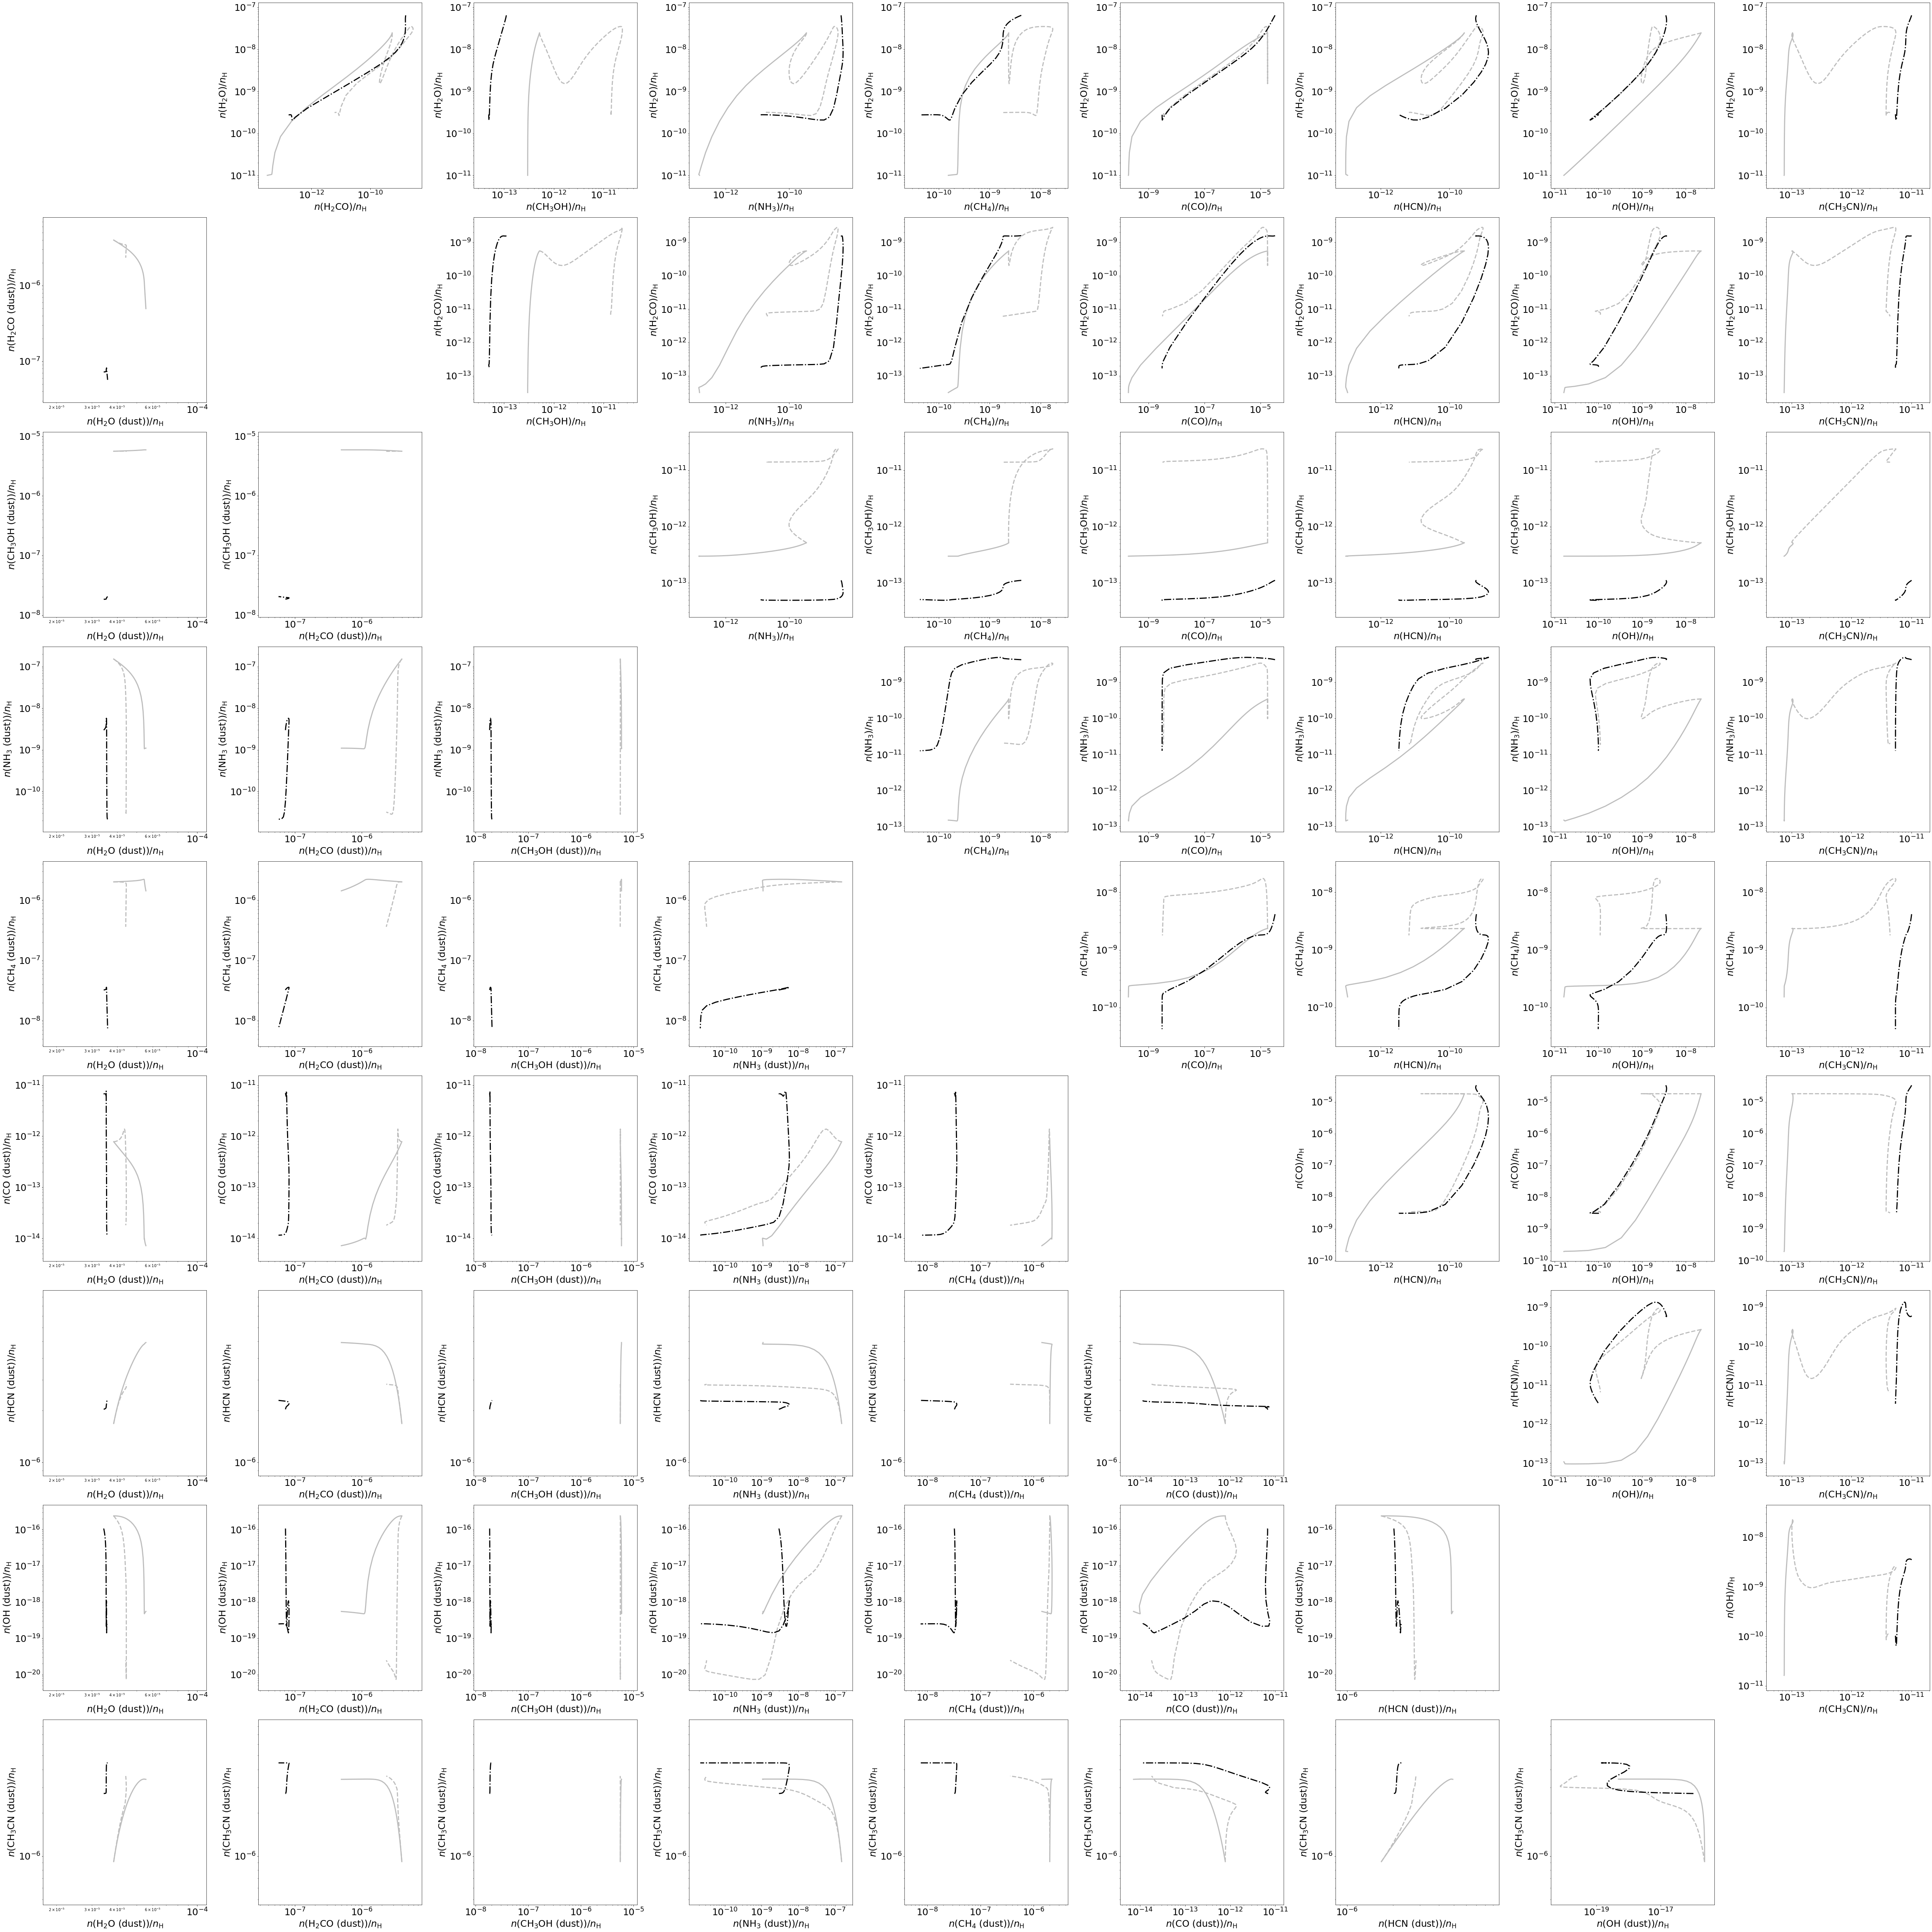

In [72]:
species = ['H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'CO', 'HCN', 'OH', 'CH3CN']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'H_DUSTH_DUSTC_DUSTO_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'N_DUSTH_DUSTH_DUSTH_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTH_DUST', 'C_DUSTO_DUST', 'H_DUSTC_DUSTN_DUST',
    'O_DUSTH_DUST', 'C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST'
]

l = len(species)
f, ax = plt.subplots(l, l, figsize=(8 * l, 8 * l))
for i in range(l):
    for j in range(l):
        if (i == j):
            f.delaxes(ax[i, j])
        if (i < j):
            spe1, spe2 = species[j], species[i]
            label1, label2 = None, None
        else:
            spe1, spe2 = species_DUST[j], species_DUST[i]
            label1, label2 = r'${}$ (dust)'.format(latex_name(
                species[j])), r'${}$ (dust)'.format(latex_name(species[i]))
        plot_default(spe1=spe1,
                     spe2=spe2,
                     ax=ax[i, j],
                     color='#bdbdbd',
                     label1=label1,
                     label2=label2,
                     tmin=1e6)
        ax[i, j].tick_params(labelsize=25)

plt.tight_layout()
#plt.savefig('../../../Report/Fig/default_2.eps')

## CO diagnose

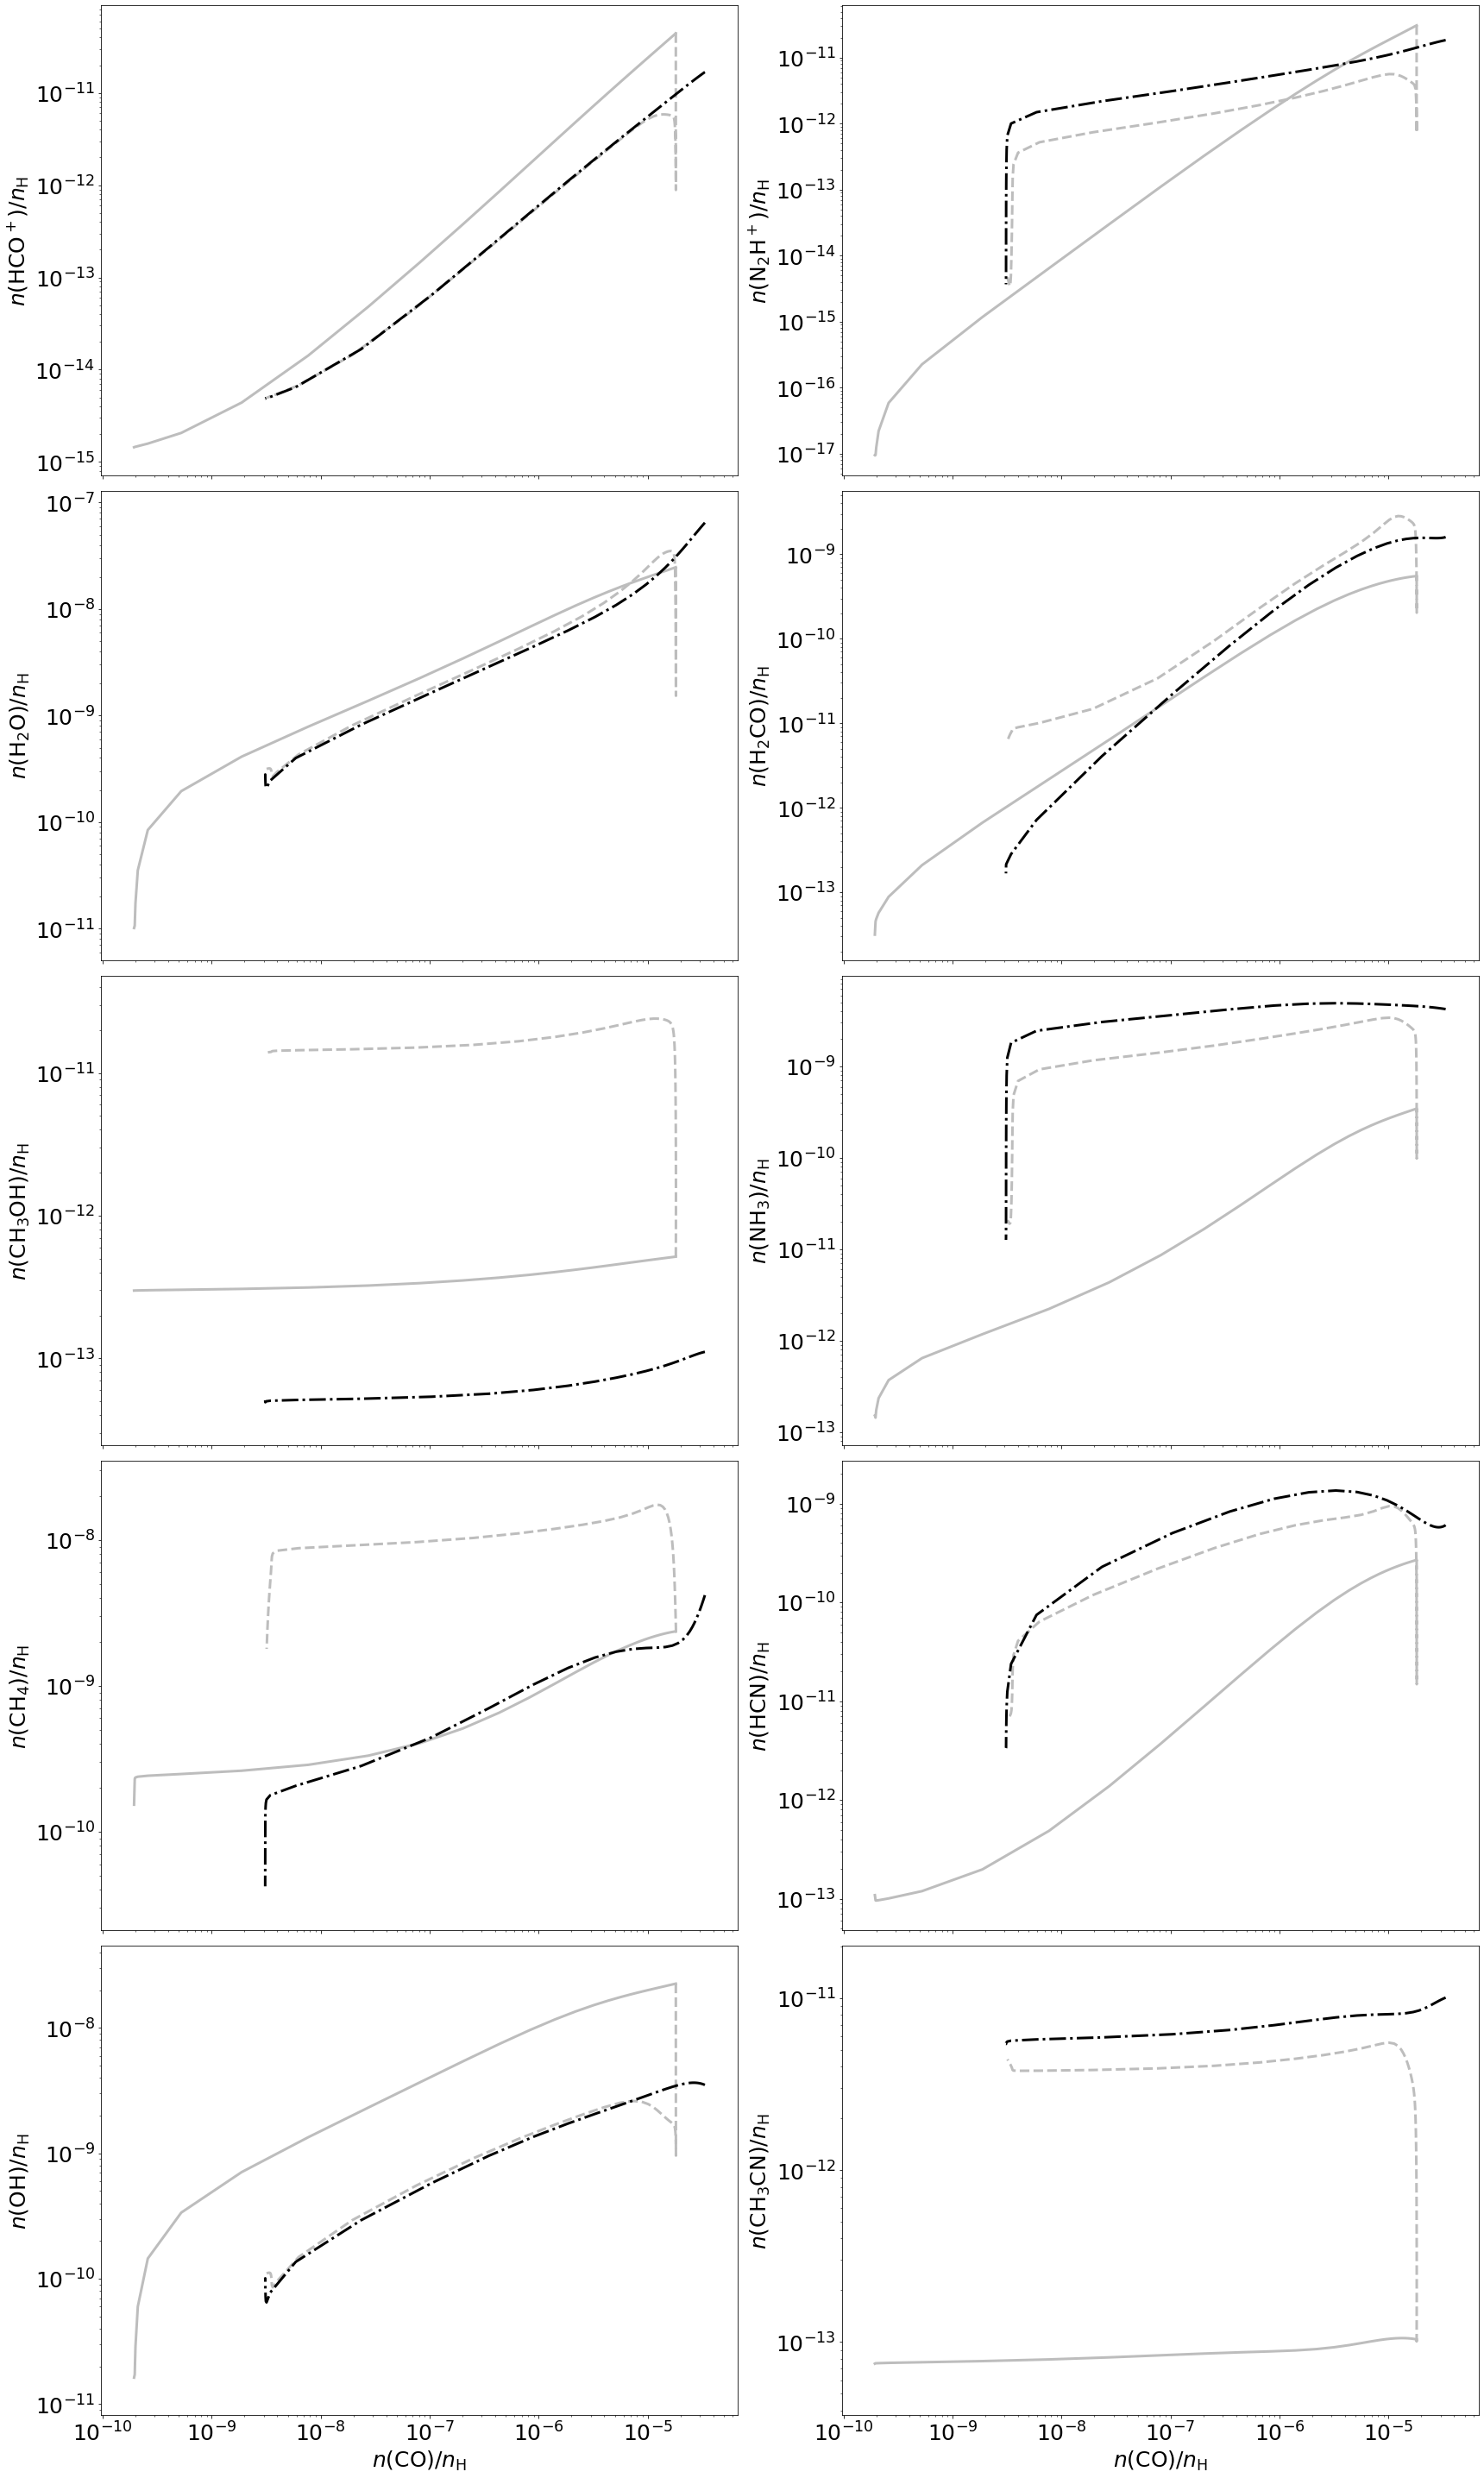

In [11]:
f, ax = plt.subplots(5, 2, figsize=(24, 40), sharex=True)
ax = ax.flatten()

species = ['HCOj', 'N2Hj', 'H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'HCN', 'OH', 'CH3CN']

for k, spe in enumerate(species):
    plot_default(spe2=spe, spe1='CO', ax=ax[k], color='#bdbdbd',
                     tmin=1e6)

for k, a in enumerate(ax):
    a.tick_params(labelsize=25)
    if (k<len(species)-2):
        a.set_xlabel('')
plt.tight_layout()

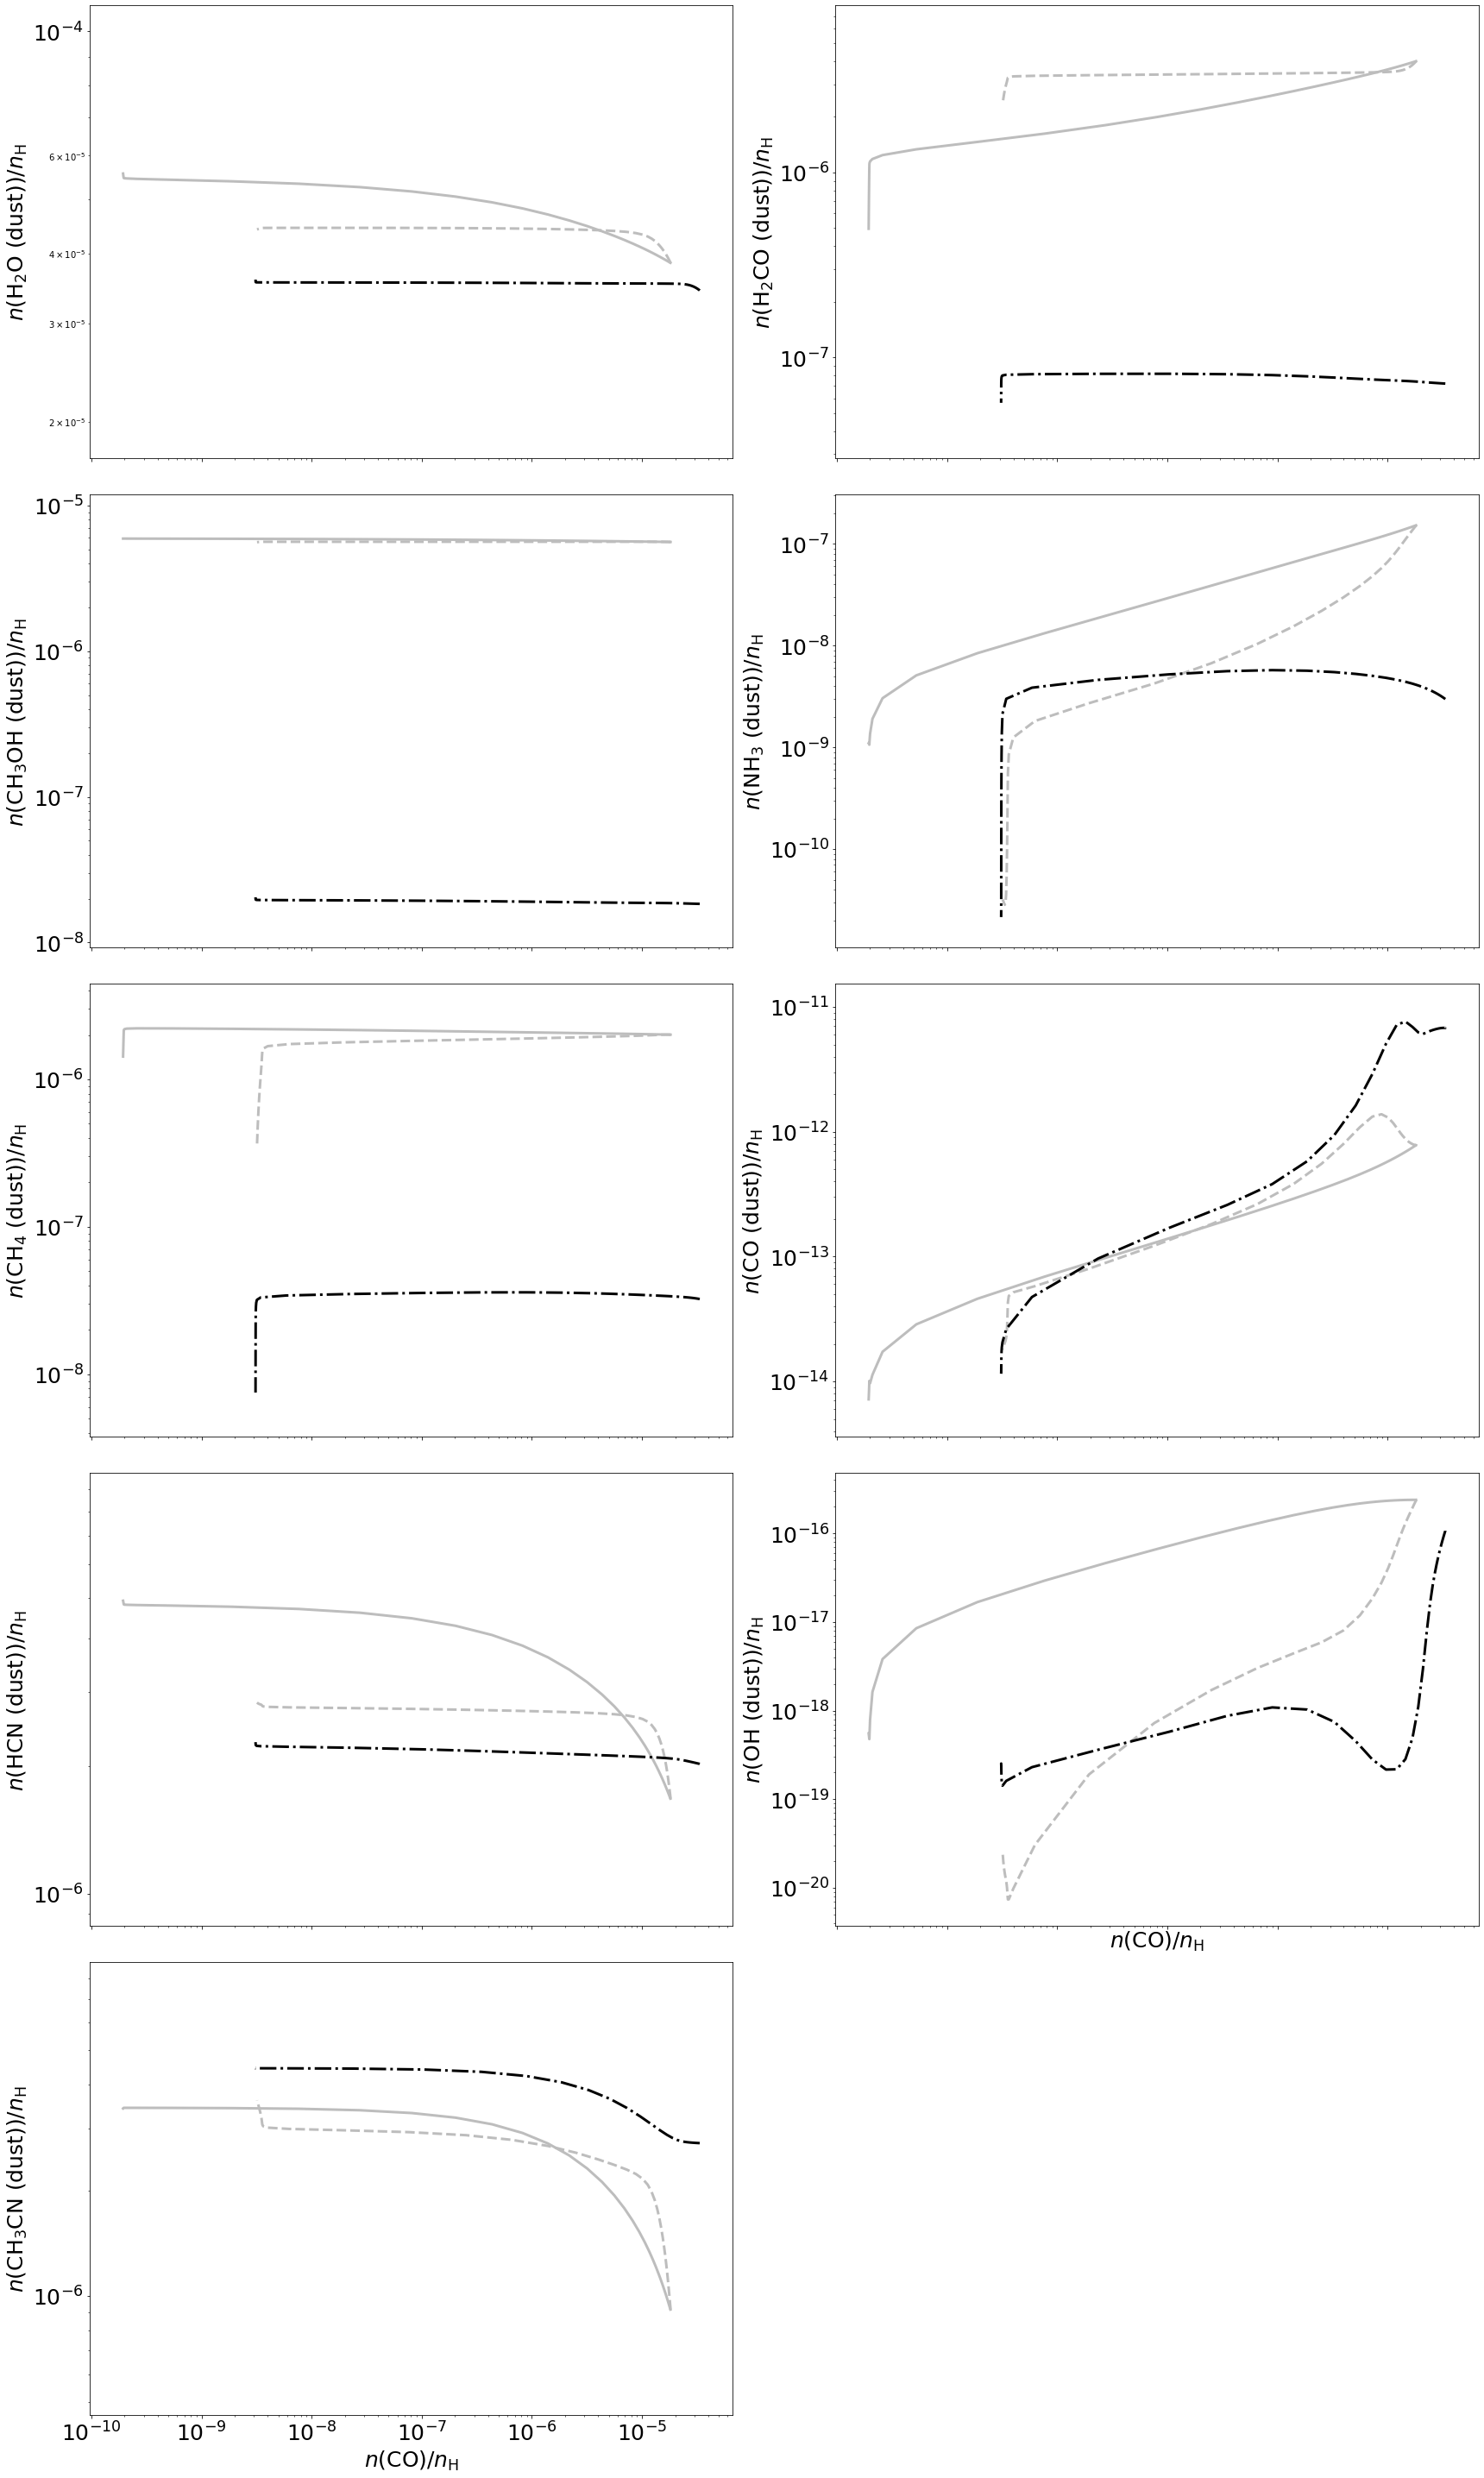

In [19]:
f, ax = plt.subplots(5, 2, figsize=(24, 40), sharex=True)
ax = ax.flatten()
species = ['H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'CO', 'HCN', 'OH', 'CH3CN']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'H_DUSTH_DUSTC_DUSTO_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'N_DUSTH_DUSTH_DUSTH_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTH_DUST', 'C_DUSTO_DUST', 'H_DUSTC_DUSTN_DUST',
    'O_DUSTH_DUST', 'C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST'
]

for k, spe in enumerate(species_DUST):
    label2 = r'${}$ (dust)'.format(latex_name(species[k]))
    plot_default(spe2=spe, spe1='CO', ax=ax[k], color='#bdbdbd', label2=label2,
                     tmin=1e6)

for k, a in enumerate(ax):
    a.tick_params(labelsize=25)
    if (k<len(species)-2):
        a.set_xlabel('')
f.delaxes(ax[-1])
plt.tight_layout()